Best parameters are {'C': 100, 'gamma': 0.001} 
Score : 98.0%


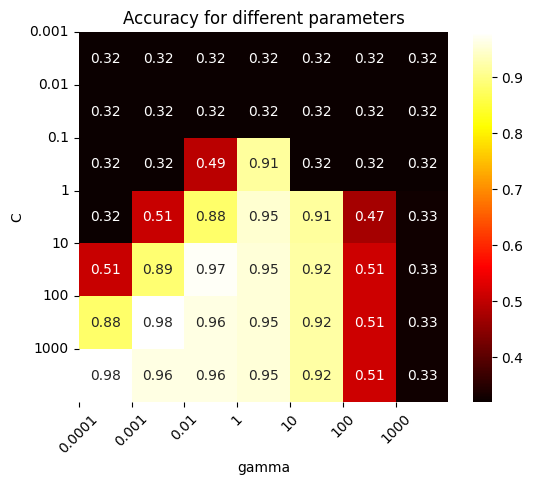

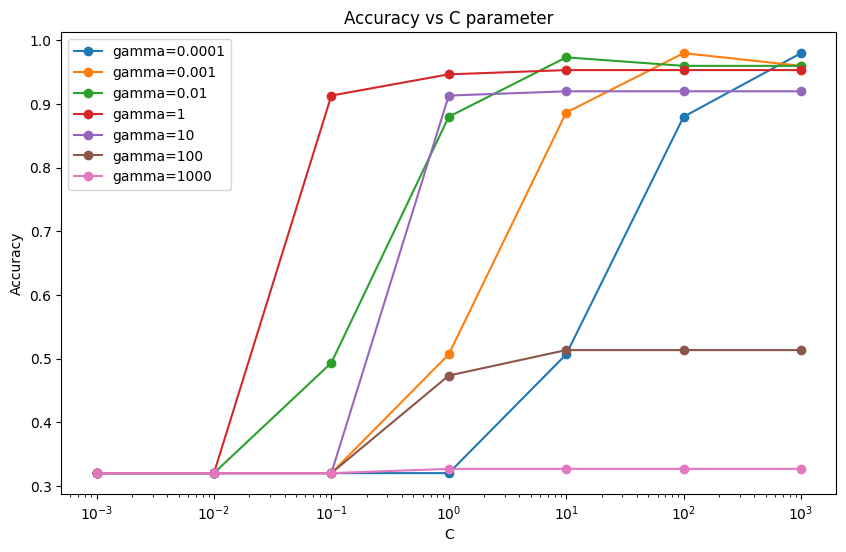

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

# load and preprocess the data
data = load_iris()
X = data.data
y = data.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma':[0.0001, 0.001, 0.01, 1, 10, 100, 1000]}

# perform grid search
svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm,
                           param_grid,
                           cv=3,
                           n_jobs=-1)
grid_search.fit(X_scaled, y)

print(
    "Best parameters are {} \nScore : {}%".format(
        grid_search.best_params_, grid_search.best_score_*100)
)

# Reshape for heatmap
scores = grid_search.cv_results_["mean_test_score"].reshape(
    len(param_grid['gamma']),
    len(param_grid['C']))

# Heatmap
sns.heatmap(scores,
            cmap = plt.cm.hot,
            annot= True,
            cbar= True,
            square=True)

plt.xlabel("gamma")
plt.ylabel("C")
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'], rotation=0)

plt.title("Accuracy for different parameters")
plt.show()

## Plot accuracy vs C parameter
plt.figure(figsize=(10, 6))
plt.title("Accuracy vs C parameter")
plt.xlabel("C")
plt.ylabel("Accuracy")
n = len(param_grid['C'])
for i in range(n):
    plt.plot(param_grid['C'],
             scores[:,i],
             'o-', label='gamma='+str(param_grid['gamma'][i]))

plt.legend()
plt.xscale('log')
plt.show()

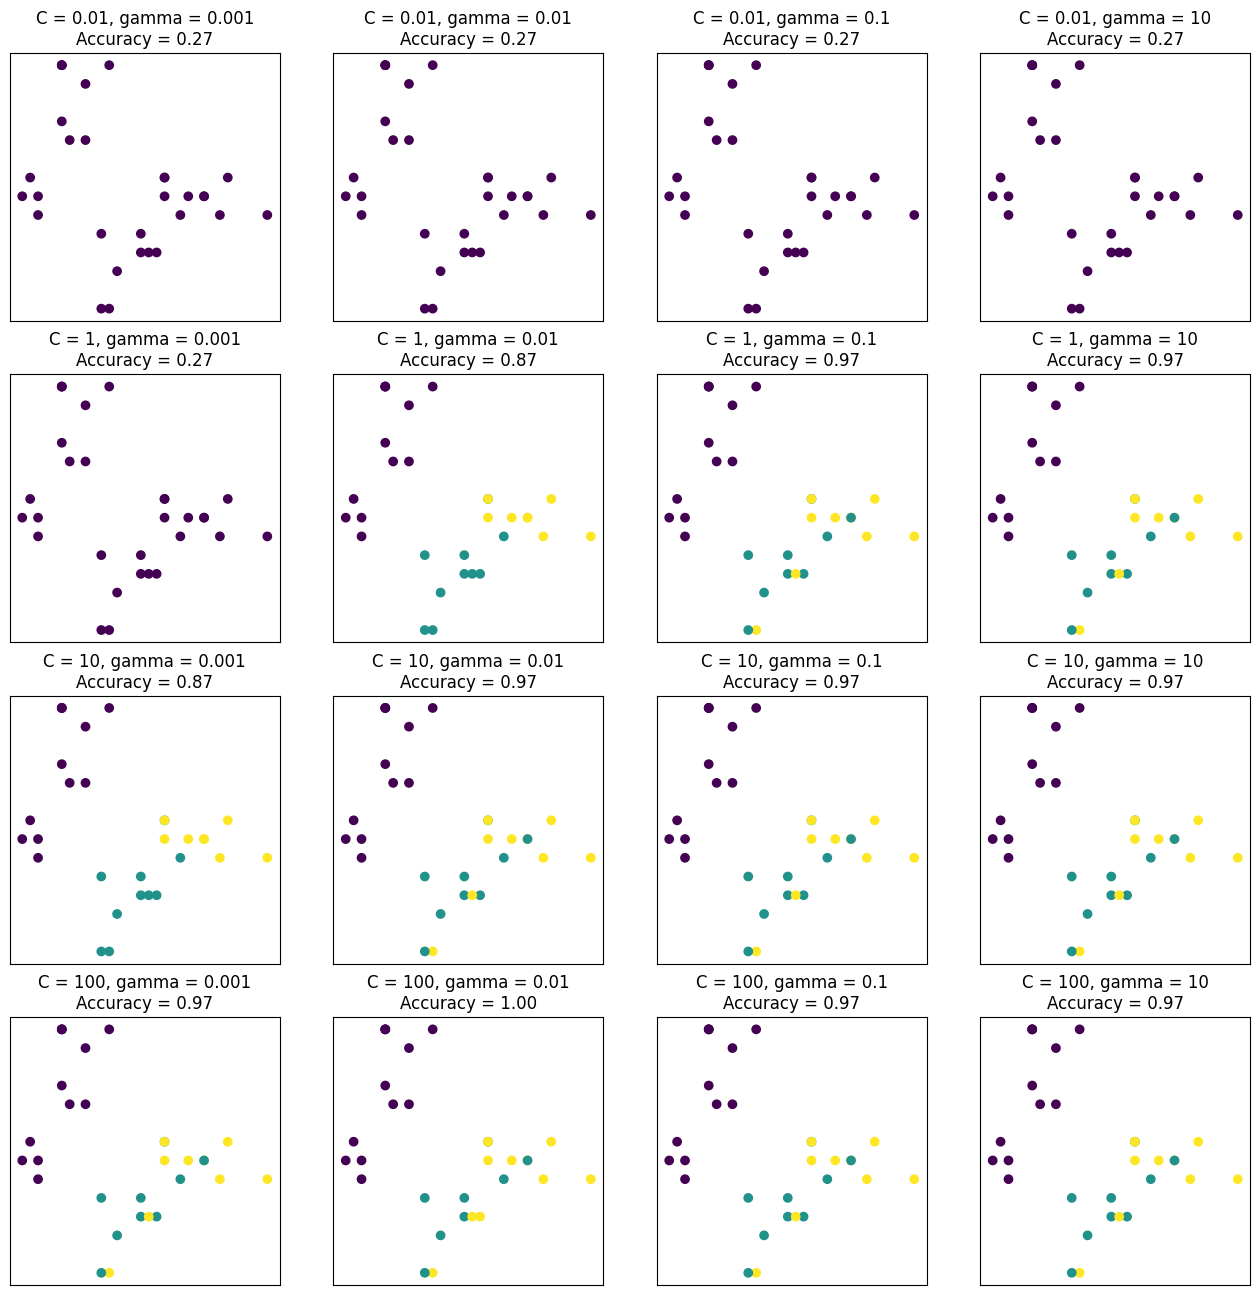

In [2]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y, test_size=0.2,
                                                    random_state=23)
# define the parameter grid
param_grid = {'C': [0.01, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 10]}


# Create a figure to plot the results
fig, axs = plt.subplots(len(param_grid['C']),
                        len(param_grid['gamma']),
                        figsize=(16,16),
                        sharey=True)

# Loop through the parameter values and train an SVM for each combination
for i, C in enumerate(param_grid['C']):
    for j, gamma in enumerate(param_grid['gamma']):
        clf = SVC(kernel='rbf', C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        axs[i,j].scatter(X_test[:,0], X_test[:,1], c=y_pred)
        axs[i,j].set_xticks(())
        axs[i,j].set_yticks(())
        axs[i,j].set_title('C = {}, gamma = {}\nAccuracy = {:.2f}'.format(
            C, gamma, accuracy))

plt.show()